In [2]:
import covers

In [4]:
covertable = covers.get_covers_table("../data/main_dataset.csv")

In [ ]:
covertable

In [ ]:
covertable.columns

In [ ]:
covertable['img_paths']

In [ ]:
categorylist = list(set(list(covertable['category'])))

In [ ]:
categorylist

In [ ]:
categoryvals = list(range(len(categorylist)))

In [ ]:
categoryvals

In [ ]:
cat2label = dict(zip(categorylist, categoryvals))

In [ ]:
covertable['label'] = [cat2label[x] for x in covertable['category']]

In [ ]:
covertable['label']

In [ ]:
cat2label

In [ ]:
covertable['category'][-10:]

In [ ]:
covertable.iloc[560]['img_paths']

In [3]:
coversdataset = covers.CoversDataset("../data/main_dataset.csv", "../data/", (300,200))

In [5]:
testrow = coversdataset[5]

/home/xsayas@GU.GU.SE/.local/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [6]:
testrow

(tensor([[[ 83,  83,  83,  ...,  83,  83,  83],
          [ 83,  83,  83,  ...,  83,  83,  83],
          [ 83,  83,  83,  ...,  83,  83,  83],
          ...,
          [ 82,  82,  82,  ...,  83,  83,  83],
          [ 82,  82,  82,  ...,  83,  83,  83],
          [ 82,  82,  82,  ...,  83,  83,  82]],
 
         [[180, 180, 180,  ..., 180, 180, 180],
          [180, 180, 180,  ..., 180, 180, 180],
          [180, 180, 180,  ..., 180, 180, 180],
          ...,
          [179, 179, 179,  ..., 180, 180, 180],
          [179, 179, 179,  ..., 180, 180, 180],
          [179, 179, 179,  ..., 180, 180, 179]],
 
         [[189, 189, 189,  ..., 189, 189, 189],
          [189, 189, 189,  ..., 189, 189, 189],
          [189, 189, 189,  ..., 189, 189, 189],
          ...,
          [188, 188, 188,  ..., 189, 189, 189],
          [188, 188, 188,  ..., 189, 189, 189],
          [188, 188, 188,  ..., 189, 189, 188]]], dtype=torch.uint8),
 16)

In [7]:
coversdataset.cat2label

{'Health': 0,
 'Reference': 1,
 'Humour': 2,
 'History-Archaeology': 3,
 'Entertainment': 4,
 'Religion': 5,
 'Art-Photography': 6,
 'Graphic-Novels-Anime-Manga': 7,
 'Dictionaries-Languages': 8,
 'Science-Fiction-Fantasy-Horror': 9,
 'Crafts-Hobbies': 10,
 'Crime-Thriller': 11,
 'Mind-Body-Spirit': 12,
 'Technology-Engineering': 13,
 'Travel-Holiday-Guides': 14,
 'Sport': 15,
 'Medical': 16,
 'Transport': 17,
 'Poetry-Drama': 18,
 'Stationery': 19,
 'Home-Garden': 20,
 'Society-Social-Sciences': 21,
 'Food-Drink': 22,
 'Teen-Young-Adult': 23,
 'Business-Finance-Law': 24,
 'Science-Geography': 25,
 'Computing': 26,
 'Childrens-Books': 27,
 'Romance': 28,
 'Teaching-Resources-Education': 29,
 'Natural-History': 30,
 'Biography': 31,
 'Personal-Development': 32}

In [9]:
from torchvision.transforms import ToPILImage

In [10]:
pilimagizer = ToPILImage()

In [11]:
from matplotlib.pyplot import show

In [12]:
show(pilimagizer(testrow[0]))

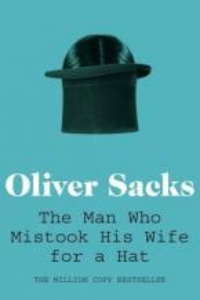

In [13]:
pilimagizer(testrow[0])